In [2]:
!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.31 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5689.3/8062.4 GB disk)


In [3]:
from ultralytics import YOLO

from IPython.display import display, Image

In [4]:
import cv2 as cv
import torch
import numpy as np
import os
from PIL import Image
from scipy.ndimage import uniform_filter
import matplotlib.pyplot as plt
from tqdm import tqdm


In [5]:
root = '/kaggle/input/task24/task2024/'
model_path = os.path.join(root,'buildings_yolov8m.pt')
image_path = os.path.join(root,'Image.tif')

In [6]:
image = cv.imread(image_path)

image.shape


(11824, 9920, 3)

In [7]:
#### Dividing the image into patches of size 512*512*3 for gaining better results.
#### An overlap of 64 is considered to avoid any edges that can be might be left of while cropping.



def extract_patches(image, patch_size=512, overlap=64):
    patches = []
    stride = patch_size - overlap

    for y in range(0, image.shape[0] - patch_size + 1, stride):
        for x in range(0, image.shape[1] - patch_size + 1, stride):
            patch = image[y:y + patch_size, x:x + patch_size]
            patches.append(patch)

    return patches


#### The below code is used to reconstruct the patches to orignal image 


def reconstruct_image(patches, original_image_shape, patch_size=512, overlap=64):
    stride = patch_size - overlap
    reconstructed_image = np.zeros(original_image_shape, dtype=np.float32)
    count = np.zeros(original_image_shape, dtype=np.float32)

    patch_idx = 0

    for y in range(0, original_image_shape[0] - patch_size + 1, stride):
        for x in range(0, original_image_shape[1] - patch_size + 1, stride):
            reconstructed_image[y:y + patch_size, x:x + patch_size] += patches[patch_idx]
            count[y:y + patch_size, x:x + patch_size] += 1
            patch_idx += 1

    reconstructed_image = (reconstructed_image / np.maximum(count, 1)).astype(np.uint8)

    return reconstructed_image

In [8]:
### Load the model 
model = YOLO(model_path)


In [14]:
### After several experiments conf = 0.15 is set.
### We perform predictions on each patch and the prediction are save as an array further used to reconstruction.

conf = 0.15
original_image_shape = (11824, 9920, 3)

##### Extract overlapping patches
patches = extract_patches(image, patch_size=512, overlap=64)
predicted_patches = []

for i in tqdm(patches):
    
    prediction = model.predict(i,conf = conf, imgsz = 512, verbose = False, save = True)
    img = cv.imread('/kaggle/working/runs/segment/predict/image0.jpg')    
    img = np.array(img)
    predicted_patches.append(img)



  0%|          | 0/572 [00:00<?, ?it/s]

Results saved to runs/segment/predict


  0%|          | 1/572 [00:00<04:04,  2.33it/s]

Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict


  1%|          | 5/572 [00:00<00:48, 11.73it/s]

Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict


  2%|▏         | 9/572 [00:00<00:29, 19.03it/s]

Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict


  2%|▏         | 14/572 [00:00<00:21, 26.14it/s]

Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict


  3%|▎         | 19/572 [00:00<00:17, 30.86it/s]

Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict


  4%|▍         | 24/572 [00:00<00:15, 34.71it/s]

Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict


  5%|▌         | 29/572 [00:01<00:14, 37.00it/s]

Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict


  6%|▌         | 34/572 [00:01<00:14, 37.66it/s]

Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict


  7%|▋         | 39/572 [00:01<00:14, 37.98it/s]

Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict


  8%|▊         | 44/572 [00:01<00:13, 38.91it/s]

Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict


  9%|▊         | 49/572 [00:01<00:13, 40.04it/s]

Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict


  9%|▉         | 54/572 [00:01<00:13, 38.70it/s]

Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict


 10%|█         | 59/572 [00:01<00:12, 39.58it/s]

Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict


 11%|█         | 64/572 [00:01<00:12, 39.89it/s]

Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict


 12%|█▏        | 69/572 [00:02<00:12, 40.55it/s]

Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict


 13%|█▎        | 74/572 [00:02<00:12, 39.56it/s]

Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict


 14%|█▍        | 79/572 [00:02<00:12, 40.26it/s]

Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict


 15%|█▍        | 84/572 [00:02<00:11, 41.87it/s]

Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict


 16%|█▌        | 89/572 [00:02<00:11, 42.11it/s]

Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict


 16%|█▋        | 94/572 [00:02<00:11, 41.29it/s]

Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict


 17%|█▋        | 99/572 [00:02<00:11, 41.90it/s]

Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict


 18%|█▊        | 104/572 [00:02<00:10, 42.64it/s]

Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict


 19%|█▉        | 109/572 [00:03<00:10, 43.12it/s]

Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict


 20%|█▉        | 114/572 [00:03<00:10, 42.26it/s]

Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict


 21%|██        | 119/572 [00:03<00:10, 42.38it/s]

Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict


 22%|██▏       | 124/572 [00:03<00:10, 43.19it/s]

Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict


 23%|██▎       | 129/572 [00:03<00:10, 42.51it/s]

Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict


 23%|██▎       | 134/572 [00:03<00:10, 41.53it/s]

Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict


 24%|██▍       | 139/572 [00:03<00:10, 41.68it/s]

Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict


 25%|██▌       | 144/572 [00:03<00:10, 42.50it/s]

Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict


 26%|██▌       | 149/572 [00:03<00:09, 43.32it/s]

Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict


 27%|██▋       | 154/572 [00:04<00:09, 42.22it/s]

Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict


 28%|██▊       | 159/572 [00:04<00:09, 43.33it/s]

Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict


 29%|██▊       | 164/572 [00:04<00:09, 43.44it/s]

Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict


 30%|██▉       | 169/572 [00:04<00:09, 42.27it/s]

Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict


 30%|███       | 174/572 [00:04<00:09, 42.19it/s]

Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict


 31%|███▏      | 179/572 [00:04<00:09, 41.71it/s]

Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict


 32%|███▏      | 184/572 [00:04<00:09, 41.37it/s]

Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict


 33%|███▎      | 189/572 [00:04<00:09, 41.09it/s]

Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict


 34%|███▍      | 194/572 [00:05<00:09, 41.54it/s]

Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict


 35%|███▍      | 199/572 [00:05<00:09, 41.23it/s]

Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict


 36%|███▌      | 204/572 [00:05<00:08, 41.25it/s]

Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict


 37%|███▋      | 209/572 [00:05<00:08, 41.38it/s]

Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict


 37%|███▋      | 214/572 [00:05<00:08, 41.72it/s]

Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict


 38%|███▊      | 219/572 [00:05<00:08, 41.83it/s]

Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict


 39%|███▉      | 224/572 [00:05<00:08, 40.95it/s]

Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict


 40%|████      | 229/572 [00:05<00:08, 42.04it/s]

Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict


 41%|████      | 234/572 [00:06<00:07, 42.33it/s]

Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict


 42%|████▏     | 239/572 [00:06<00:07, 42.19it/s]

Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict


 43%|████▎     | 244/572 [00:06<00:07, 41.69it/s]

Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict


 44%|████▎     | 249/572 [00:06<00:07, 41.18it/s]

Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict


 44%|████▍     | 254/572 [00:06<00:07, 41.04it/s]

Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict


 45%|████▌     | 259/572 [00:06<00:07, 40.76it/s]

Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict


 46%|████▌     | 264/572 [00:06<00:07, 41.20it/s]

Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict


 47%|████▋     | 269/572 [00:06<00:07, 40.95it/s]

Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict


 48%|████▊     | 274/572 [00:07<00:07, 39.75it/s]

Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict


 49%|████▊     | 278/572 [00:07<00:07, 39.64it/s]

Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict


 49%|████▉     | 283/572 [00:07<00:07, 40.44it/s]

Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict


 50%|█████     | 288/572 [00:07<00:06, 41.12it/s]

Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict


 51%|█████     | 293/572 [00:07<00:06, 40.50it/s]

Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict


 52%|█████▏    | 298/572 [00:07<00:06, 40.35it/s]

Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict


 53%|█████▎    | 303/572 [00:07<00:06, 39.77it/s]

Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict


 54%|█████▍    | 308/572 [00:07<00:06, 41.19it/s]

Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict


 55%|█████▍    | 313/572 [00:07<00:06, 40.95it/s]

Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict


 56%|█████▌    | 318/572 [00:08<00:06, 40.64it/s]

Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict


 56%|█████▋    | 323/572 [00:08<00:06, 40.57it/s]

Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict


 57%|█████▋    | 328/572 [00:08<00:05, 41.04it/s]

Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict


 58%|█████▊    | 333/572 [00:08<00:05, 41.34it/s]

Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict


 59%|█████▉    | 338/572 [00:08<00:05, 40.19it/s]

Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict


 60%|█████▉    | 343/572 [00:08<00:05, 40.17it/s]

Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict


 61%|██████    | 348/572 [00:08<00:05, 40.29it/s]

Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict


 62%|██████▏   | 353/572 [00:08<00:05, 39.98it/s]

Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict


 63%|██████▎   | 358/572 [00:09<00:05, 39.60it/s]

Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict


 63%|██████▎   | 362/572 [00:09<00:05, 39.48it/s]

Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict


 64%|██████▍   | 367/572 [00:09<00:05, 40.06it/s]

Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict


 65%|██████▌   | 372/572 [00:09<00:05, 39.03it/s]

Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict


 66%|██████▌   | 376/572 [00:09<00:05, 38.53it/s]

Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict


 66%|██████▋   | 380/572 [00:09<00:05, 37.42it/s]

Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict


 67%|██████▋   | 384/572 [00:09<00:05, 37.26it/s]

Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict


 68%|██████▊   | 388/572 [00:09<00:04, 37.90it/s]

Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict


 69%|██████▊   | 392/572 [00:09<00:04, 38.16it/s]

Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict


 69%|██████▉   | 396/572 [00:10<00:04, 38.28it/s]

Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict


 70%|██████▉   | 400/572 [00:10<00:04, 37.72it/s]

Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict


 71%|███████   | 404/572 [00:10<00:04, 37.77it/s]

Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict


 71%|███████▏  | 408/572 [00:10<00:04, 37.58it/s]

Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict


 72%|███████▏  | 412/572 [00:10<00:04, 38.24it/s]

Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict


 73%|███████▎  | 416/572 [00:10<00:04, 38.16it/s]

Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict


 73%|███████▎  | 420/572 [00:10<00:04, 37.51it/s]

Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict


 74%|███████▍  | 424/572 [00:10<00:03, 38.10it/s]

Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict


 75%|███████▍  | 428/572 [00:10<00:03, 38.12it/s]

Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict


 76%|███████▌  | 433/572 [00:11<00:03, 39.79it/s]

Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict


 76%|███████▋  | 437/572 [00:11<00:03, 39.39it/s]

Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict


 77%|███████▋  | 441/572 [00:11<00:03, 38.60it/s]

Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict


 78%|███████▊  | 445/572 [00:11<00:03, 38.03it/s]

Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict


 78%|███████▊  | 449/572 [00:11<00:03, 38.07it/s]

Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict


 79%|███████▉  | 454/572 [00:11<00:02, 39.34it/s]

Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict


 80%|████████  | 458/572 [00:11<00:02, 38.41it/s]

Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict


 81%|████████  | 462/572 [00:11<00:02, 38.46it/s]

Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict


 81%|████████▏ | 466/572 [00:11<00:02, 38.13it/s]

Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict


 82%|████████▏ | 470/572 [00:12<00:02, 37.63it/s]

Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict


 83%|████████▎ | 475/572 [00:12<00:02, 39.19it/s]

Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict


 84%|████████▎ | 479/572 [00:12<00:02, 38.44it/s]

Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict


 84%|████████▍ | 483/572 [00:12<00:02, 38.17it/s]

Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict


 85%|████████▌ | 488/572 [00:12<00:02, 38.71it/s]

Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict


 86%|████████▌ | 493/572 [00:12<00:01, 39.86it/s]

Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict


 87%|████████▋ | 498/572 [00:12<00:01, 40.81it/s]

Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict


 88%|████████▊ | 503/572 [00:12<00:01, 39.50it/s]

Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict


 89%|████████▉ | 508/572 [00:12<00:01, 39.93it/s]

Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict


 90%|████████▉ | 512/572 [00:13<00:01, 38.97it/s]

Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict


 90%|█████████ | 517/572 [00:13<00:01, 41.62it/s]

Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict


 91%|█████████▏| 522/572 [00:13<00:01, 41.00it/s]

Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict


 92%|█████████▏| 527/572 [00:13<00:01, 40.34it/s]

Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict


 93%|█████████▎| 532/572 [00:13<00:01, 39.38it/s]

Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict


 94%|█████████▍| 537/572 [00:13<00:00, 41.54it/s]

Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict


 95%|█████████▍| 542/572 [00:13<00:00, 42.89it/s]

Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict


 96%|█████████▌| 547/572 [00:13<00:00, 40.58it/s]

Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict


 97%|█████████▋| 552/572 [00:14<00:00, 42.56it/s]

Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict


 98%|█████████▊| 558/572 [00:14<00:00, 44.89it/s]

Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict


 98%|█████████▊| 563/572 [00:14<00:00, 46.00it/s]

Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict


 99%|█████████▉| 568/572 [00:14<00:00, 44.51it/s]

Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict


100%|██████████| 572/572 [00:14<00:00, 39.53it/s]


In [15]:
##### Reconstruction of the predicted patches to single image to its original size

reconstructed_prediction = reconstruct_image(predicted_patches, original_image_shape, patch_size=512, overlap=64)
cv.imwrite(f'/kaggle/working/reconstructed_image{conf}.jpg',reconstructed_prediction)    

True

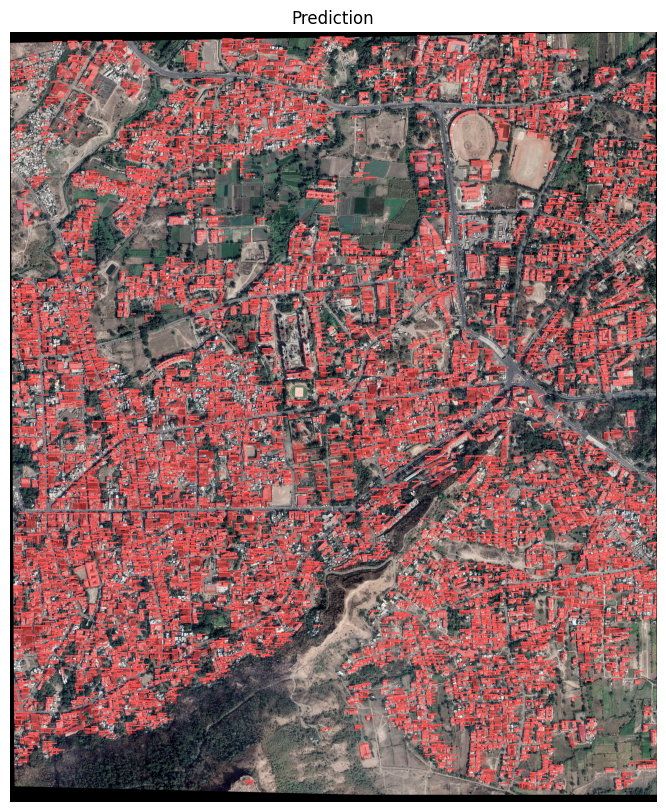

In [16]:
reconstructed_prediction_rgb = cv.cvtColor(reconstructed_prediction, cv.COLOR_BGR2RGB)
plt.figure(figsize=(20,10))
plt.imshow(reconstructed_prediction_rgb)
plt.axis('off')
plt.title('Prediction')
plt.show()


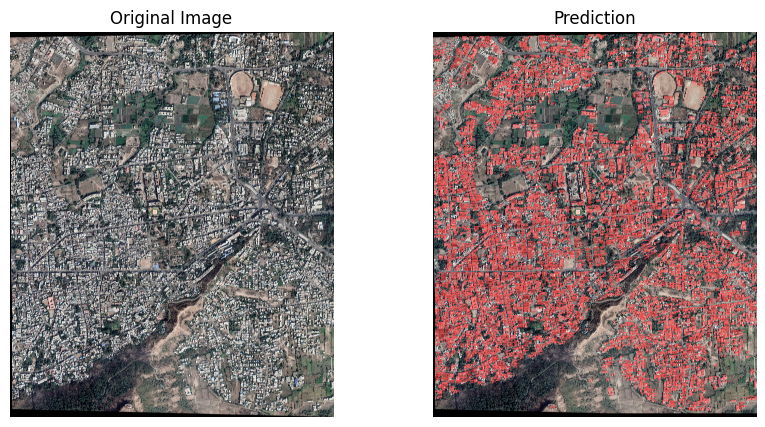

In [17]:
image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Display original image
axes[0].imshow(image_rgb)
axes[0].set_title('Original Image')
axes[0].axis('off')

# Display reconstructed image
axes[1].imshow(reconstructed_prediction_rgb)
axes[1].set_title('Prediction')
axes[1].axis('off')

plt.show()